In [9]:
# import libraries
import numpy as np
import pandas as pd
import os
import glob
import re
import matplotlib.pyplot as plt
import seaborn as sns
import re


from pathlib import Path

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

# load in directories
from experiment_code.constants import Defaults

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
#PREPROCESS_PILOT
#load in task data from gorilla
df1 = pd.read_csv(os.path.join(Defaults.RAW_DIR, "prepilot_task_v10_v1sheet.csv"))
df2 = pd.read_csv(os.path.join(Defaults.RAW_DIR, "prepilot_task_v10_v2sheet.csv"))
df3 = pd.read_csv(os.path.join(Defaults.RAW_DIR, "prepilot_task_v14_v1sheet.csv"))
df4 = pd.read_csv(os.path.join(Defaults.RAW_DIR, "prepilot_task_v14_v2sheet.csv"))

#load in english data from gorilla
df1_english = pd.read_csv(os.path.join(Defaults.RAW_DIR, "prepilot_english_5-12-20.csv"))
df2_english = pd.read_csv(os.path.join(Defaults.RAW_DIR, "prepilot_english_5-13-20.csv"))
df3_english = pd.read_csv(os.path.join(Defaults.RAW_DIR, "prepilot_english_5-17-20.csv"))
df4_english = pd.read_csv(os.path.join(Defaults.RAW_DIR, "prepilot_english_5-17-20_2.csv"))

In [11]:
# merge task dataframes
df = df1.append([df2, df3, df4])
#df_v1 = df1.append(df2)
#df_v2 = df3.append(df4)
#df_sheet1 = df1.append(df3)
#df_sheet2 = df2.append(df4)
df_english = df1_english.append([df2_english, df3_english, df4_english])

In [12]:
#df = pd.read_csv(os.path.join(Defaults.RAW_DIR, "prepilot_task_v17.csv"))
#different columns: no ANSWER, no condition, add cloze_descript, add condition_name, add CoRT_descript, add word_count
    #replace block_num for block

## Clean data

In [13]:
# filter dataframe to remove redundant cols
df_filtered = df.filter({'Experiment ID', 'Experiment Version', 'Task Version','Participant Private ID', 'Spreadsheet Name', 'Spreadsheet Row', 'Zone Type', 'Reaction Time', 'Response', 'Correct', 'Incorrect', 'display', 'full_sentence', 
                        'last_word', 'sampled', 'target_word','random_word','ANSWER', 'cloze_probability', 'CoRT_mean', 'condition', 'sampled', 'block', 'cloze_probability', 
                        'condition', 'cloze_descript', 'condition_name', 'CoRT_descript', 'word_count', 'block_num'})

In [14]:
#rename some columns
df_filtered = df_filtered.rename({'Zone Type':'zone_type', 'Reaction Time':'RT','Spreadsheet Row': 'sentence_num','Participant Private ID':'participant_ID', 'Experiment ID':'experiment_id', 'Task Version':'task_version', 
                    'Experiment Version':'experiment_version', 'Spreadsheet Name':'spreadsheet_version', 'ANSWER':'answer', 'Correct':'correct', 'Response':'response', 'Incorrect':'incorrect', 'cloze_probability':'cloze'}, axis=1)

In [15]:
# select desired rows
df_filtered = df_filtered.query('zone_type=="response_keyboard_single"')
df_filtered

,incorrect,answer,response,participant_ID,random_word,experiment_id,sentence_num,target_word,block,RT,...,last_word,experiment_version,cloze,display,condition,zone_type,task_version,CoRT_mean,correct,spreadsheet_version
10,0.0,NaN,True,1390018.0,NaN,17283.0,1.0,NaN,NaN,1405.055,...,NaN,8.0,NaN,instructions,NaN,response_keyboard_single,10.0,NaN,1.0,Spreadsheet V1
18,0.0,NaN,False,1390018.0,NaN,17283.0,1.0,NaN,NaN,1061.105,...,NaN,8.0,NaN,instructions,NaN,response_keyboard_single,10.0,NaN,1.0,Spreadsheet V1
36,1.0,NaN,False,1390018.0,NaN,17283.0,1.0,NaN,NaN,899.080,...,NaN,8.0,NaN,instructions,NaN,response_keyboard_single,10.0,NaN,0.0,Spreadsheet V1
52,0.0,True,True,1390018.0,boo,17283.0,2.0,place,1.0,693.645,...,place,8.0,0.52,trial,CoRT,response_keyboard_single,10.0,4.6,1.0,Spreadsheet V1
64,0.0,True,True,1390018.0,read,17283.0,3.0,moat,1.0,669.850,...,moat,8.0,0.39,trial,CoRT,response_keyboard_single,10.0,4.5,1.0,Spreadsheet V1
77,0.0,True,True,1390018.0,teach,17283.0,4.0,teach,1.0,789.640,...,teach,8.0,0.89,trial,non-CoRT,response_keyboard_single,10.0,1.1666666666666667,1.0,Spreadsheet V1
90,0.0,True,True,1390018.0,whale,17283.0,5.0,monster,1.0,764.380,...,monster,8.0,0.31,trial,CoRT,response_keyboard_single,10.0,4.8,1.0,Spreadsheet V1
102,0.0,True,True,1390018.0,charge,17283.0,6.0,knitted,1.0,865.160,...,knitted,8.0,0.4,trial,CoRT,response_keyboard_single,10.0,4.4,1.0,Spreadsheet V1
113,0.0,True,True,1390018.0,roof,17283.0,7.0,hoop,1.0,574.905,...,hoop,8.0,0.99,trial,non-CoRT,response_keyboard_single,10.0,1.6,1.0,Spreadsheet V1
124,0.0,True,True,1390018.0,tongue,17283.0,8.0,apple,1.0,792.945,...,apple,8.0,0.31,trial,non-CoRT,response_keyboard_single,10.0,1.6666666666666667,1.0,Spreadsheet V1


In [8]:
# create dataframe only with correct responses
df_correct = df_filtered[df_filtered.correct != 0]
df_correct

,incorrect,answer,response,participant_ID,random_word,experiment_id,sentence_num,target_word,block,RT,...,last_word,experiment_version,cloze,display,condition,zone_type,task_version,CoRT_mean,correct,spreadsheet_version
10,0.0,NaN,True,1390018.0,NaN,17283.0,1.0,NaN,NaN,1405.055,...,NaN,8.0,NaN,instructions,NaN,response_keyboard_single,10.0,NaN,1.0,Spreadsheet V1
18,0.0,NaN,False,1390018.0,NaN,17283.0,1.0,NaN,NaN,1061.105,...,NaN,8.0,NaN,instructions,NaN,response_keyboard_single,10.0,NaN,1.0,Spreadsheet V1
52,0.0,True,True,1390018.0,boo,17283.0,2.0,place,1.0,693.645,...,place,8.0,0.52,trial,CoRT,response_keyboard_single,10.0,4.6,1.0,Spreadsheet V1
64,0.0,True,True,1390018.0,read,17283.0,3.0,moat,1.0,669.850,...,moat,8.0,0.39,trial,CoRT,response_keyboard_single,10.0,4.5,1.0,Spreadsheet V1
77,0.0,True,True,1390018.0,teach,17283.0,4.0,teach,1.0,789.640,...,teach,8.0,0.89,trial,non-CoRT,response_keyboard_single,10.0,1.1666666666666667,1.0,Spreadsheet V1
90,0.0,True,True,1390018.0,whale,17283.0,5.0,monster,1.0,764.380,...,monster,8.0,0.31,trial,CoRT,response_keyboard_single,10.0,4.8,1.0,Spreadsheet V1
102,0.0,True,True,1390018.0,charge,17283.0,6.0,knitted,1.0,865.160,...,knitted,8.0,0.4,trial,CoRT,response_keyboard_single,10.0,4.4,1.0,Spreadsheet V1
113,0.0,True,True,1390018.0,roof,17283.0,7.0,hoop,1.0,574.905,...,hoop,8.0,0.99,trial,non-CoRT,response_keyboard_single,10.0,1.6,1.0,Spreadsheet V1
124,0.0,True,True,1390018.0,tongue,17283.0,8.0,apple,1.0,792.945,...,apple,8.0,0.31,trial,non-CoRT,response_keyboard_single,10.0,1.6666666666666667,1.0,Spreadsheet V1
150,0.0,True,True,1390018.0,robe,17283.0,10.0,lint,1.0,877.175,...,lint,8.0,0.53,trial,non-CoRT,response_keyboard_single,10.0,1.5,1.0,Spreadsheet V1


In [16]:
df_correct.sampled.unique()

array([nan, 'False', 'True'], dtype=object)

In [17]:
# create dataframe only with correct and meaningful responses
df_new_filtered = df_correct.query('sampled=="False"')
df_new_filtered

,incorrect,answer,response,participant_ID,random_word,experiment_id,sentence_num,target_word,block,RT,...,last_word,experiment_version,cloze,display,condition,zone_type,task_version,CoRT_mean,correct,spreadsheet_version
52,0.0,True,True,1390018.0,boo,17283.0,2.0,place,1.0,693.645,...,place,8.0,0.52,trial,CoRT,response_keyboard_single,10.0,4.6,1.0,Spreadsheet V1
64,0.0,True,True,1390018.0,read,17283.0,3.0,moat,1.0,669.850,...,moat,8.0,0.39,trial,CoRT,response_keyboard_single,10.0,4.5,1.0,Spreadsheet V1
77,0.0,True,True,1390018.0,teach,17283.0,4.0,teach,1.0,789.640,...,teach,8.0,0.89,trial,non-CoRT,response_keyboard_single,10.0,1.1666666666666667,1.0,Spreadsheet V1
90,0.0,True,True,1390018.0,whale,17283.0,5.0,monster,1.0,764.380,...,monster,8.0,0.31,trial,CoRT,response_keyboard_single,10.0,4.8,1.0,Spreadsheet V1
102,0.0,True,True,1390018.0,charge,17283.0,6.0,knitted,1.0,865.160,...,knitted,8.0,0.4,trial,CoRT,response_keyboard_single,10.0,4.4,1.0,Spreadsheet V1
113,0.0,True,True,1390018.0,roof,17283.0,7.0,hoop,1.0,574.905,...,hoop,8.0,0.99,trial,non-CoRT,response_keyboard_single,10.0,1.6,1.0,Spreadsheet V1
124,0.0,True,True,1390018.0,tongue,17283.0,8.0,apple,1.0,792.945,...,apple,8.0,0.31,trial,non-CoRT,response_keyboard_single,10.0,1.6666666666666667,1.0,Spreadsheet V1
150,0.0,True,True,1390018.0,robe,17283.0,10.0,lint,1.0,877.175,...,lint,8.0,0.53,trial,non-CoRT,response_keyboard_single,10.0,1.5,1.0,Spreadsheet V1
163,0.0,True,True,1390018.0,meat,17283.0,11.0,heal,1.0,583.320,...,heal,8.0,0.9,trial,non-CoRT,response_keyboard_single,10.0,1.2,1.0,Spreadsheet V1
186,0.0,True,True,1390018.0,hot,17283.0,13.0,job,1.0,532.085,...,job,8.0,0.76,trial,non-CoRT,response_keyboard_single,10.0,1.75,1.0,Spreadsheet V1


## Visualizations - collective dataset

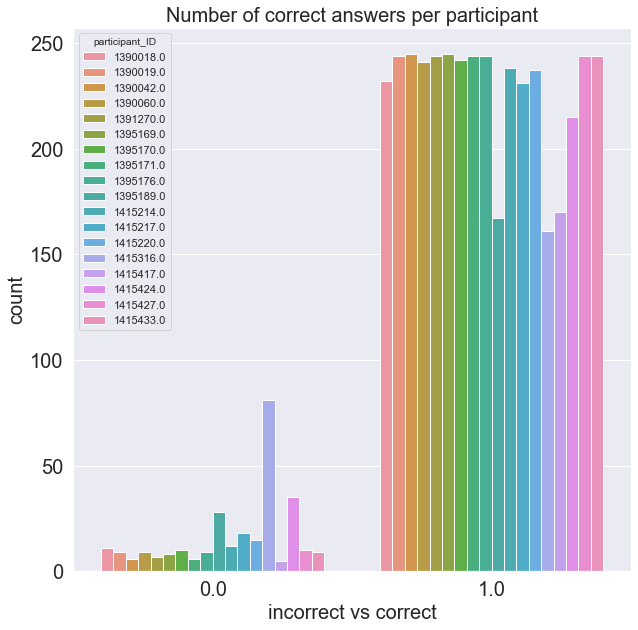

In [125]:
# ***distribution_of_correct_per_participant
# note: NA are counted as 0
df_filtered.participant_ID.unique()

plt.figure(figsize=(10,10));
sns.countplot(x='correct', hue='participant_ID', data= df_filtered);
plt.xlabel('incorrect vs correct', fontsize=20)
plt.ylabel('count', fontsize=20)
plt.title('Number of correct answers per participant', fontsize=20);
plt.xticks(fontsize=20)
plt.yticks(fontsize=20);

Answers mean: 0.9341864716636198


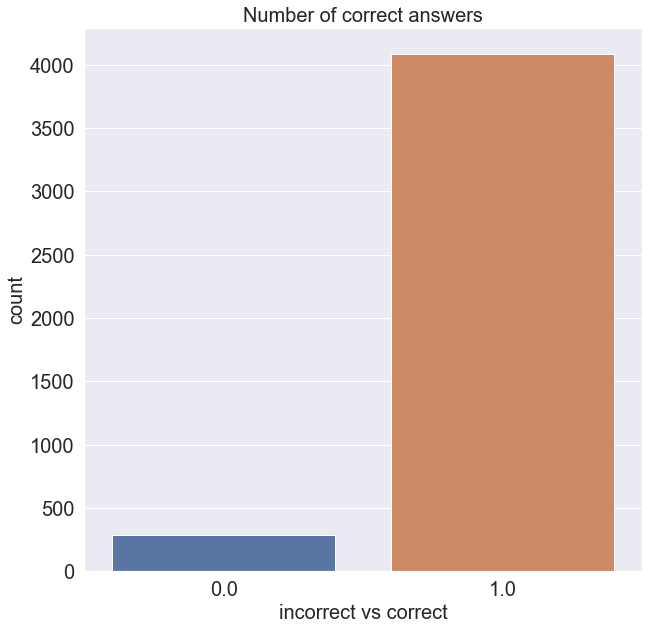

In [126]:
# distribution_of_correct
# note: NA are counted as 0

plt.figure(figsize=(10,10));
sns.countplot(x='correct', data= df_filtered);
plt.xlabel('incorrect vs correct', fontsize=20)
plt.ylabel('count', fontsize=20)
plt.title('Number of correct answers', fontsize=20);
plt.xticks(fontsize=20)
plt.yticks(fontsize=20);
print('Answers mean:', df_filtered.correct.mean())
#print('Percentage of correct vs incorrect',df_filtered['correct'].value_counts(normalize=True) * 100)

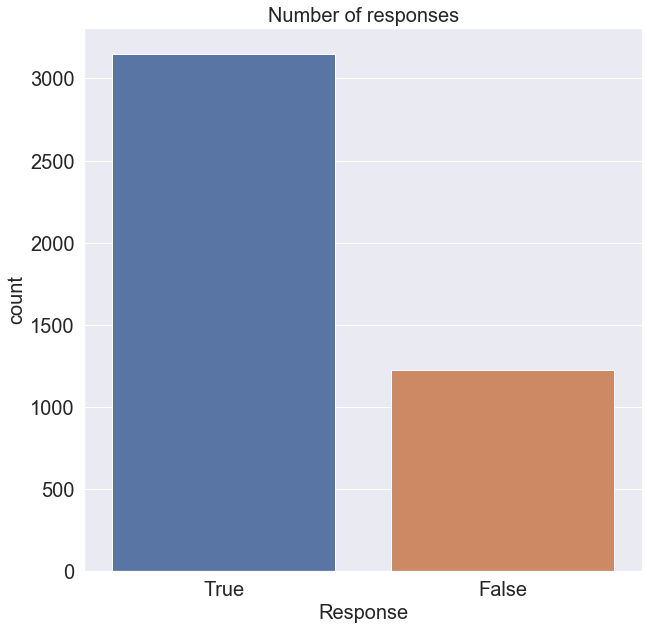

In [127]:
# distribution_of_responses
plt.figure(figsize=(10,10));
sns.countplot(x='response', data= df_filtered);
plt.xlabel('Response', fontsize=20)
plt.ylabel('count', fontsize=20)
plt.title('Number of responses', fontsize=20);
plt.xticks(fontsize=20)
plt.yticks(fontsize=20);

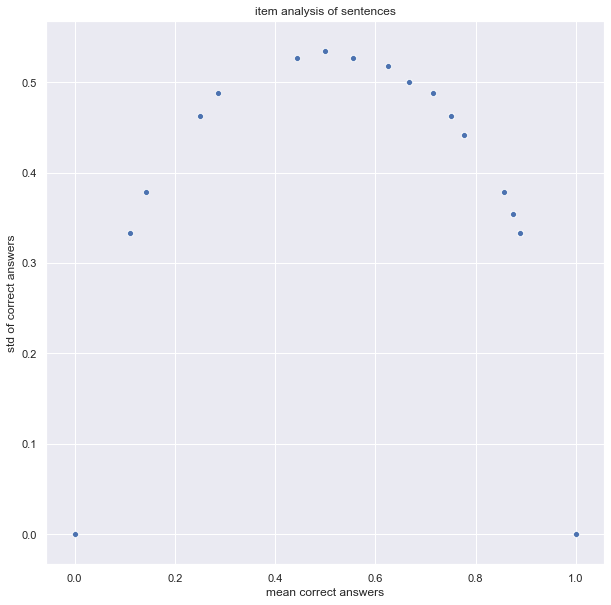

In [128]:
plt.figure(figsize=(10,10))
sns.scatterplot(df_filtered.groupby('full_sentence')['correct'].mean(), df_filtered.groupby('full_sentence')['correct'].std())
plt.xlabel('mean correct answers')
plt.ylabel('std of correct answers')
plt.title('item analysis of sentences')
plt.show()
#df_filtered.groupby('full_sentence').groups - look at groups represented

## Visualizations - RT Dist

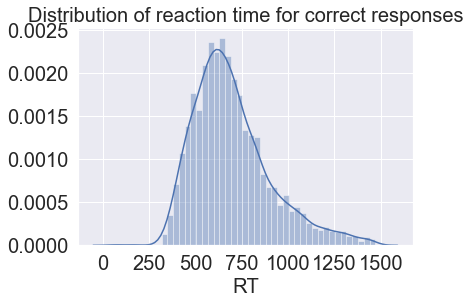

RT mean: 697.1828791583292


In [129]:
# rt_dist_correct
sns.distplot(df_correct['RT'])
plt.xlabel('RT', fontsize=20)
plt.title('Distribution of reaction time for correct responses', fontsize=20);
plt.xticks(fontsize=20)
plt.yticks(fontsize=20);
plt.show()
print('RT mean:', df_correct.RT.mean())

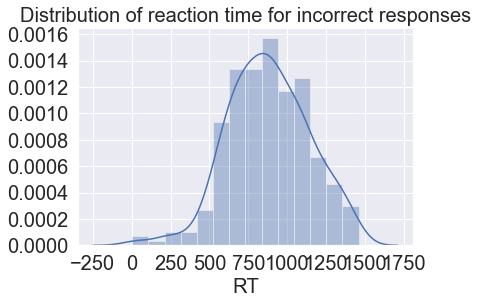

RT mean: 881.4552256982837


In [130]:
#investigating incorrect for fun
df_incorrect = df_filtered[df_filtered.correct != 1]
# rt_dist_incorrect
sns.distplot(df_incorrect['RT'])
plt.xlabel('RT', fontsize=20)
plt.title('Distribution of reaction time for incorrect responses', fontsize=20);
plt.xticks(fontsize=20)
plt.yticks(fontsize=20);
plt.show()
print('RT mean:', df_incorrect.RT.mean())

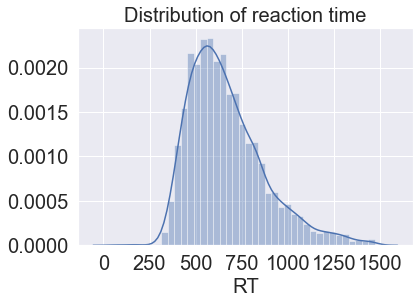

RT mean: 709.3104924589477


In [149]:
#**rt_distribution
sns.distplot(df_new_filtered['RT'])
plt.xlabel('RT', fontsize=20)
plt.title('Distribution of reaction time', fontsize=20);
plt.xticks(fontsize=20)
plt.yticks(fontsize=20);
plt.show()
print('RT mean:', df_filtered.RT.mean())

## Visualizations - by version/block

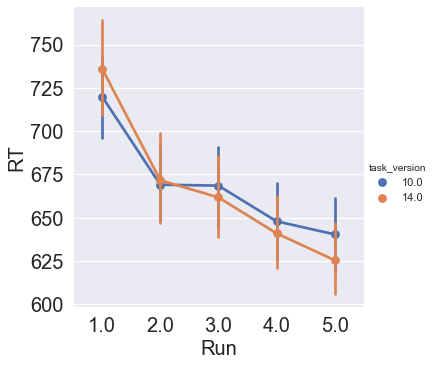

In [150]:
# run_rt_by_version
# rt for different levels
sns.set(rc={'figure.figsize':(20,10)})
# versions = dataframe['version'].unique()

sns.factorplot(x='block', y='RT', hue='task_version', data=df_new_filtered)
plt.xlabel('Run', fontsize=20),
plt.ylabel('RT', fontsize=20)
plt.title('', fontsize=20);
plt.tick_params(axis = 'both', which = 'major', labelsize = 20)

plt.show()

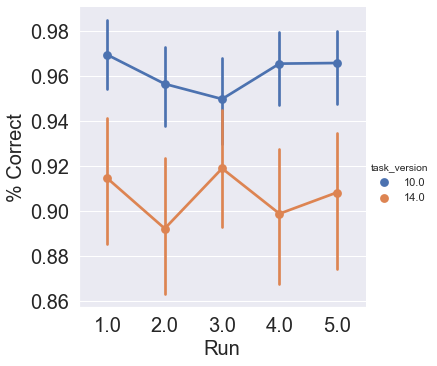

In [134]:
# run_accuracy_by_version
# accuracy across different levels
sns.set(rc={'figure.figsize':(20,10)})
# versions = dataframe['version'].unique()

sns.factorplot(x='block', y='correct', hue='task_version', data=df_filtered)
plt.xlabel('Run', fontsize=20),
plt.ylabel('% Correct', fontsize=20)
plt.title('', fontsize=20);
plt.tick_params(axis = 'both', which = 'major', labelsize = 20)

plt.show()

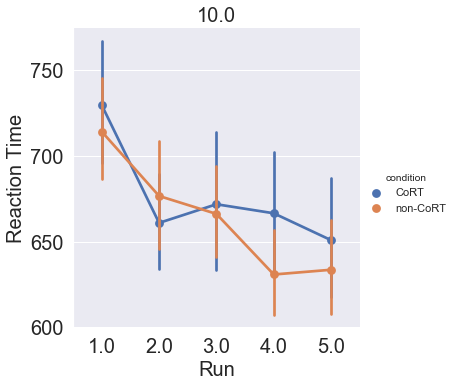

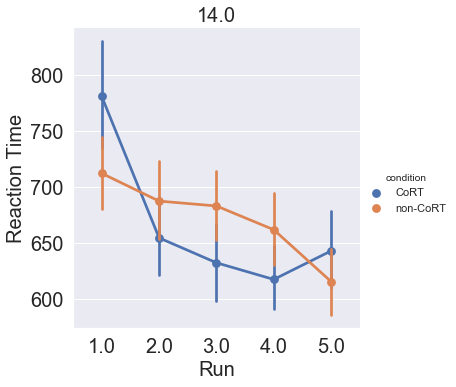

In [18]:
# rt for different levels
sns.set(rc={'figure.figsize':(20,10)})

versions = df_new_filtered['task_version'].unique()

for i, version in enumerate(versions):

    sns.factorplot(x='block', y='RT', hue='condition', data=df_new_filtered.query(f'task_version == {version}'))
    plt.xlabel('Run', fontsize=20)
    plt.ylabel('Reaction Time', fontsize=20)
    plt.title(f'{versions[i]}', fontsize=20);
    plt.tick_params(axis = 'both', which = 'major', labelsize = 20)

    plt.show()

In [136]:
versions

array([10., 14.])

## Visualizations - by block

In [137]:
# rt_across_blocks

## Visualizations - by cloze

In [138]:
# accuracy_dist_with_cloze

In [139]:
# rt_across_cloze

In [140]:
# divide into arbitrary easy vs hard cloze
# TypeError: '>=' not supported between instances of 'str' and 'float'
def _describe_cloze(x):
    if x >= 0.7:
        value = 'high cloze'
    elif x <= 0.5:
        value = 'low cloze'
    else:
        value = 'medium cloze'
    return value

# describe cloze
df_filtered['cloze_descrip'] = df_filtered['cloze'].apply(lambda x: _describe_cloze(x))

TypeError: '>=' not supported between instances of 'str' and 'float'

## Visualizations - from Maedbh's code

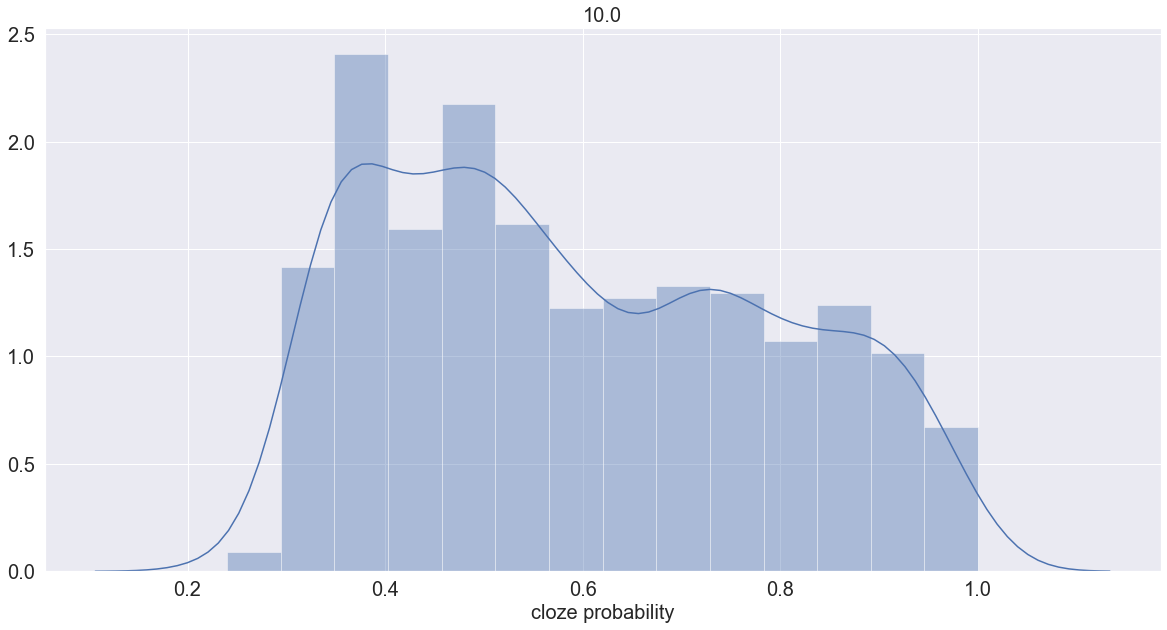

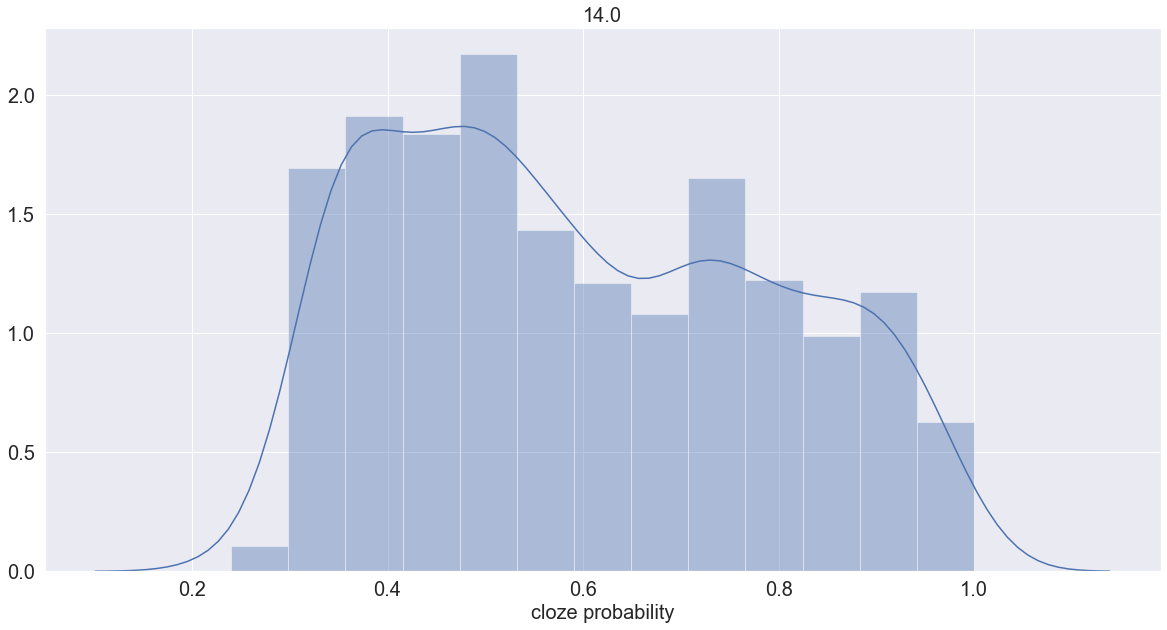

In [157]:
#def cloze_distribution(self, dataframe):
    #sns.set(rc={'figure.figsize':(20,10)})

    #versions = dataframe['version'].unique()

#version_descripts = dataframe['version_descript'].unique()

for i, version in enumerate(versions):

    df = df_new_filtered.query(f'task_version=={version}')
    
    #looks at meaningful and correct

    sns.distplot(df['cloze'])
    plt.title(f'{versions[i]}', fontsize=20)
    plt.xlabel('cloze probability', fontsize=20)
    plt.tick_params(axis = 'both', which = 'major', labelsize = 20)

    plt.show()

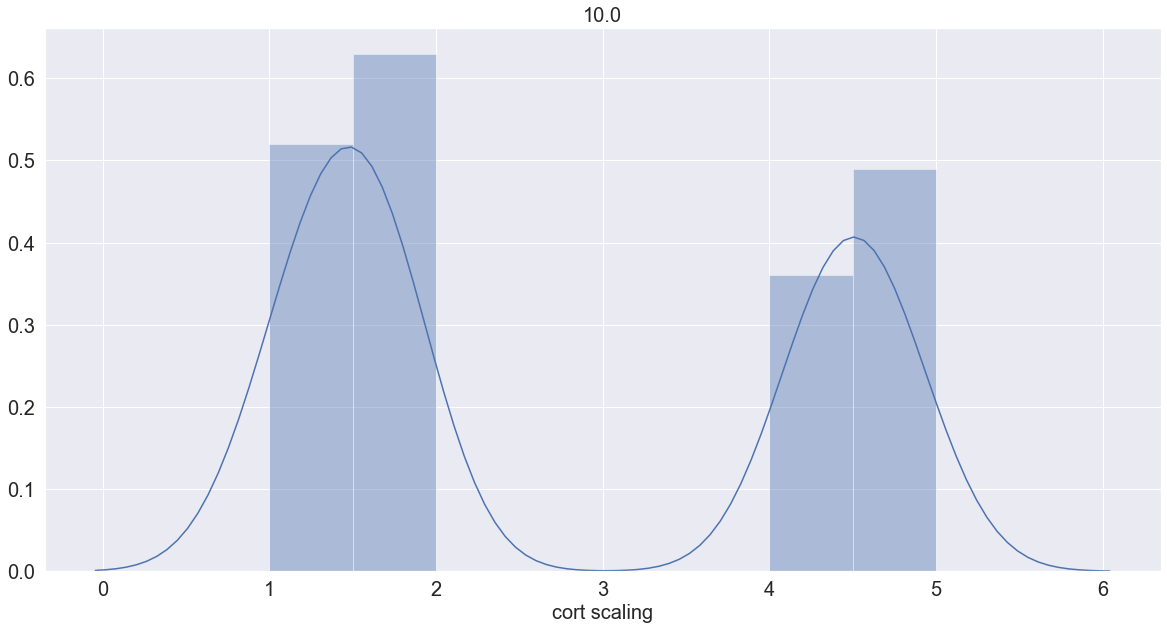

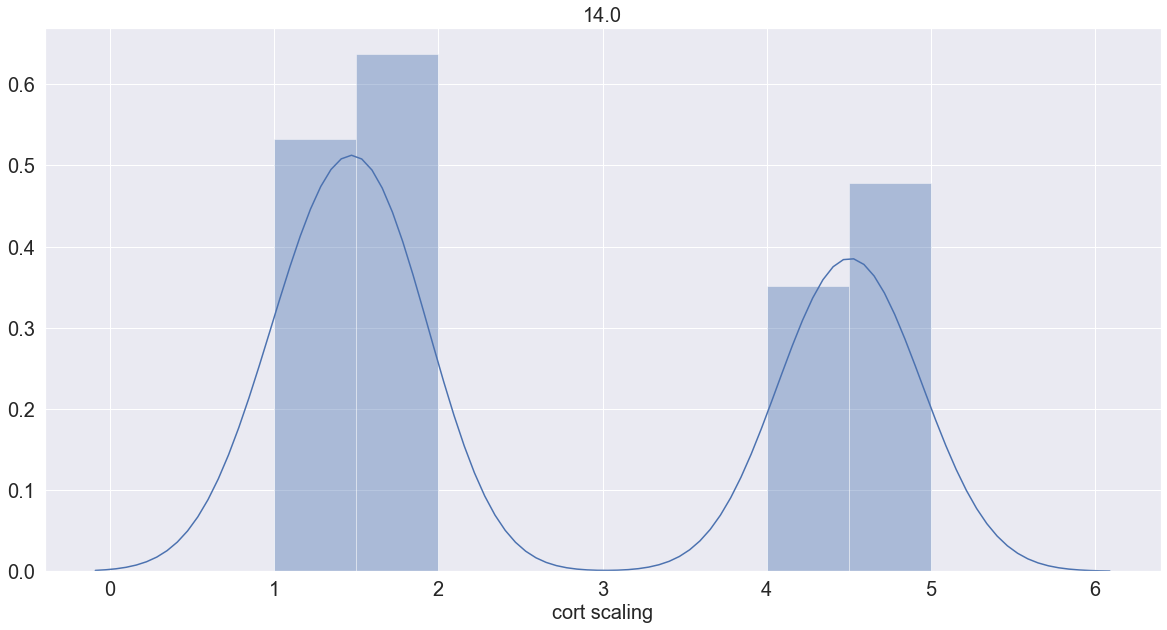

In [160]:
#def cort_distribution(self, dataframe):

sns.set(rc={'figure.figsize':(20,10)})

    #versions = dataframe['version'].unique()
    #version_descripts = dataframe['version_descript'].unique()

for i, version in enumerate(versions):

    df = df_new_filtered.query(f'task_version=={version}')

    sns.distplot(df['CoRT_mean'])
    plt.title(f'{versions[i]}', fontsize=20)
    plt.xlabel('cort scaling', fontsize=20)
    plt.tick_params(axis = 'both', which = 'major', labelsize = 20)

    plt.show()

In [ ]:
#only v17:
def run_reaction_time_cort(self, dataframe):
    # rt for different levels
    sns.set(rc={'figure.figsize':(20,10)})

    versions = dataframe['version'].unique()
    version_descripts = dataframe['version_descript'].unique()

    for i, version in enumerate(versions):

        sns.factorplot(x='block_num', y='rt', hue='CoRT_descript', data=dataframe.query(f'Attempt==1 and Correct==1 and sampled==False and good_subjs==[True] and version=={version}')) 
        plt.xlabel('Run', fontsize=20)
        plt.ylabel('Reaction Time', fontsize=20)
        plt.title(f'{version_descripts[i]}', fontsize=20);
        plt.tick_params(axis = 'both', which = 'major', labelsize = 20)

        plt.show()

In [ ]:
#only v17
def describe_block_design(self, dataframe):
    sns.set(rc={'figure.figsize':(20,10)})

    versions = dataframe['version'].unique()
    version_descripts = dataframe['version_descript'].unique()

    for i, version in enumerate(versions):

        sns.countplot(x='block_num', hue='CoRT_descript', data=dataframe.query(f'version=={version}'))
        plt.title(f'{version_descripts[i]}', fontsize=20)
        plt.xlabel('block_design', fontsize=20)
        plt.tick_params(axis = 'both', which = 'major', labelsize = 20)

        plt.show()

## Visualizations - grouped by sentence

In [75]:
# group sentences and find mean and standard deviation for each
df_by_sentence = df_filtered.groupby(['full_sentence', 'cloze', 'CoRT_mean', 'condition','last_word','answer','target_word','random_word']).agg({'correct': ['mean', 'std']}).reset_index()
# join multilevel columns
df_by_sentence.columns = ["_".join(pair) for pair in df_by_sentence.columns]
df_by_sentence.columns = df_by_sentence.columns.str.strip('_')

In [76]:
#some basic statistics for sentences
print('mean of correct responses', df_by_sentence.correct_mean.mean())
print('sd of correct responses', df_by_sentence.correct_std.mean())
print('max of correct responses', df_by_sentence.correct_mean.max())
print('min of correct responses', df_by_sentence.correct_mean.min())

mean of correct responses 0.9358015873015872
sd of correct responses 0.12673048015061825
max of correct responses 1.0
min of correct responses 0.0


In [77]:
df_by_sentence.loc[df_by_sentence['correct_mean']<=0.5]

,full_sentence,cloze,CoRT_mean,condition,last_word,answer,target_word,random_word,correct_mean,correct_std
5,"After|college,|the|student|had|amassed|a|lot|of",0.76,1.8,non-CoRT,cake,False,debt,cake,0.500000,0.534522
72,Courtney|was|so|happy|and|relieved|she|started|to,0.71,4.333333333333333,CoRT,laugh,False,cry,laugh,0.111111,0.333333
106,"Hearing|noises|from|above,|the|confused|man|in...",0.32,4.5,CoRT,art,False,attic,art,0.500000,0.534522
202,Mark's|favorite|spot|to|fish|was|a|pier|by|the,0.34,4.4,CoRT,rocks,False,lake,rocks,0.111111,0.333333
212,Mike|exited|the|shower|and|quickly|put|on|his,0.44,4.8,CoRT,suit,False,robe,suit,0.000000,0.000000
230,"On|his|lunch|break,|the",0.87,1.6,non-CoRT,lunchsign,True,lunchsign,bridge,0.250000,0.462910
234,"Over|the|summer,|Tyler|wanted|something|to",0.77,1.25,non-CoRT,sail,False,do,sail,0.444444,0.527046
304,The|big|friendly|dog|wetted|her|face|with|his,0.7,4.5,CoRT,touch,False,tongue,touch,0.142857,0.377964
377,The|lion|wasn't,0.86,1.4,non-CoRT,fullcub,True,fullcub,rent,0.000000,0.000000
464,"To|get|rid|of|emotional|clutter,|Will|resolved|to",0.38,1.8,non-CoRT,eat,False,meditate,eat,0.285714,0.487950


In [78]:
def make_grouped_sentences_dataframe(dataframe, **kwargs):
    # create dataframe with the sentences grouped (i.e. one row for each sentence) and columns for mean and std of correct column
    # kwargs argument: 
        #correct_min: type "correct min" =
        #a decimal (0-1) of desired minimum percent of correct responses

    # group sentences and find mean and standard deviation for each
    df_by_sentence = df_filtered.groupby(['full_sentence', 'cloze', 'CoRT_mean', 'condition','last_word','answer','target_word','random_word']).agg({'correct': ['mean', 'std']}).reset_index()

    # join multilevel columns
    df_by_sentence.columns = ["_".join(pair) for pair in df_by_sentence.columns]
    df_by_sentence.columns = df_by_sentence.columns.str.strip('_')

    def _select_correct_min_mean(correct_min):
        # only returns sentences below a minimum percent of correct responses
        # input: a decimal between 0-1 

        return df_by_sentence.loc[df_by_sentence['correct_mean'] <= correct_min]

    if kwargs.get('correct_min'):
        correct_min = kwargs['correct_min']
        df_by_sentence = _select_correct_min_mean(correct_min)

    return df_by_sentence

make_grouped_sentences_dataframe(df_filtered, correct_min = 0.5)

,full_sentence,cloze,CoRT_mean,condition,last_word,answer,target_word,random_word,correct_mean,correct_std
5,"After|college,|the|student|had|amassed|a|lot|of",0.76,1.8,non-CoRT,cake,False,debt,cake,0.500000,0.534522
72,Courtney|was|so|happy|and|relieved|she|started|to,0.71,4.333333333333333,CoRT,laugh,False,cry,laugh,0.111111,0.333333
106,"Hearing|noises|from|above,|the|confused|man|in...",0.32,4.5,CoRT,art,False,attic,art,0.500000,0.534522
202,Mark's|favorite|spot|to|fish|was|a|pier|by|the,0.34,4.4,CoRT,rocks,False,lake,rocks,0.111111,0.333333
212,Mike|exited|the|shower|and|quickly|put|on|his,0.44,4.8,CoRT,suit,False,robe,suit,0.000000,0.000000
230,"On|his|lunch|break,|the",0.87,1.6,non-CoRT,lunchsign,True,lunchsign,bridge,0.250000,0.462910
234,"Over|the|summer,|Tyler|wanted|something|to",0.77,1.25,non-CoRT,sail,False,do,sail,0.444444,0.527046
304,The|big|friendly|dog|wetted|her|face|with|his,0.7,4.5,CoRT,touch,False,tongue,touch,0.142857,0.377964
377,The|lion|wasn't,0.86,1.4,non-CoRT,fullcub,True,fullcub,rent,0.000000,0.000000
464,"To|get|rid|of|emotional|clutter,|Will|resolved|to",0.38,1.8,non-CoRT,eat,False,meditate,eat,0.285714,0.487950


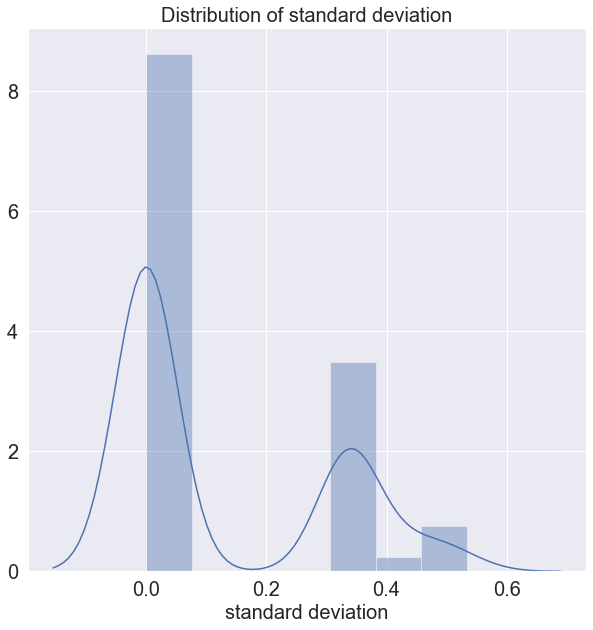

In [79]:
# correct_standard_deviation
plt.figure(figsize=(10,10))

sns.distplot(df_by_sentence['correct_std'])
plt.xlabel('standard deviation', fontsize=20)
plt.title('Distribution of standard deviation', fontsize=20);
plt.xticks(fontsize=20)
plt.yticks(fontsize=20);
plt.show()

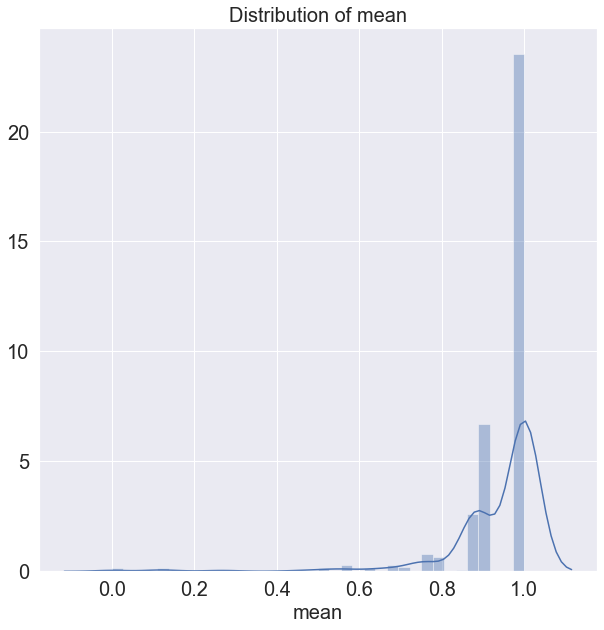

In [80]:
# correct_mean_distribution
plt.figure(figsize=(10,10))

sns.distplot(df_by_sentence['correct_mean'])
plt.xlabel('mean', fontsize=20)
plt.title('Distribution of mean', fontsize=20);
plt.xticks(fontsize=20)
plt.yticks(fontsize=20);
plt.show()

## Extra: english data analyzation

In [46]:
# filter dataframe to remove redundant cols
df_english_filtered = df_english.filter({'Experiment ID', 'Experiment Version', 'Participant Private ID', 'Spreadsheet Row', 'Zone Type', 'Reaction Time', 'Correct', 'Incorrect', 
                                        'display', 'response', 'type', 'item'})

In [47]:
# rename some columns
df_english_filtered = df_english_filtered.rename({'Experiment ID':'experiment_ID', 'Experiment Version':'experiment_version', 'Participant Private ID':'participant_ID', 'Spreadsheet Row': 'sentence_num', 'Zone Type':'zone_type', 'Reaction Time':'reaction_time', 
                                                  'Correct':'correct', 'Incorrect':'incorrect'}, axis=1)

In [48]:
# select desired rows
df_english_filtered = df_english_filtered.query('zone_type == "response_keyboard"')

In [49]:
# percentage of correct vs incorrect
df_english_filtered['correct'].value_counts(normalize=True) * 100

1.0    90.189019
0.0     9.810981
Name: correct, dtype: float64

Answers mean: 0.9471641791044776


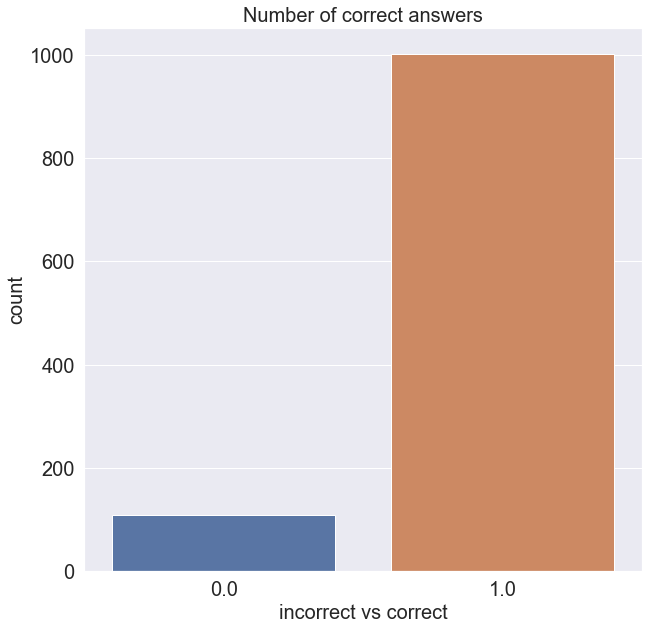

In [50]:
# distribution_of_correct_english
# note: NA are counted as 0

plt.figure(figsize=(10,10));
sns.countplot(x='correct', data= df_english_filtered);
plt.xlabel('incorrect vs correct', fontsize=20)
plt.ylabel('count', fontsize=20)
plt.title('Number of correct answers', fontsize=20);
plt.xticks(fontsize=20)
plt.yticks(fontsize=20);

print('Answers mean:', df_filtered.correct.mean())